In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/daaaata/BTC-USD (4) (3).csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Covariation analysis

In [4]:
# Compute the covariance coefficient
covariance_matrix = np.cov(np.array(data['Open']),np.array(data['High']))
covariance_coefficient = covariance_matrix[0, 1] / np.sqrt(covariance_matrix[0, 0] * covariance_matrix[1, 1])
covariance_coefficient

0.9995068751421509

In [5]:
new_data = data[['Open', 'High', 'Low', 'Close']]

In [6]:
covariance_matrix = np.cov(new_data, rowvar=False)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot: >

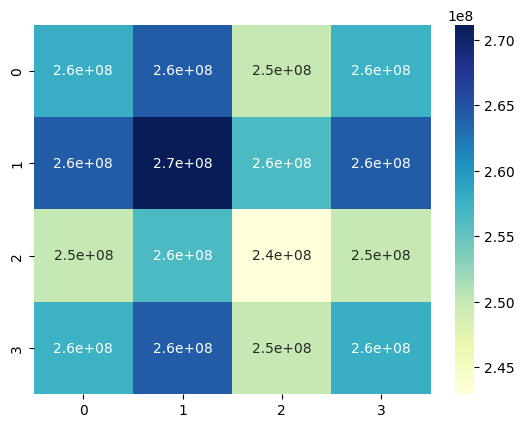

In [7]:
import seaborn as sns
sns.heatmap(covariance_matrix, annot=True, cmap="YlGnBu")

In [11]:
# Compute the covariance coefficient
covariance_matrix = np.cov(np.array(data['Open']),np.array(data['Low']))
covariance_coefficient = covariance_matrix[0, 1] / np.sqrt(covariance_matrix[0, 0] * covariance_matrix[1, 1])
covariance_coefficient

0.9990941245912842

In [12]:
covariance_matrix

array([[2.57853356e+08, 2.50055374e+08],
       [2.50055374e+08, 2.42933154e+08]])

In [13]:
# Compute the covariance coefficient
covariance_matrix = np.cov(np.array(data['Low']),np.array(data['High']))
covariance_coefficient = covariance_matrix[0, 1] / np.sqrt(covariance_matrix[0, 0] * covariance_matrix[1, 1])
covariance_coefficient

0.9989984708559835

In [14]:
# Compute the covariance coefficient
covariance_matrix = np.cov(np.array(data['Open']),np.array(data['Close']))
covariance_coefficient = covariance_matrix[0, 1] / np.sqrt(covariance_matrix[0, 0] * covariance_matrix[1, 1])
covariance_coefficient

0.9987787409653766

Since the covariance coefficient is very close to +1 we can tell that the variables exhibit strong covariance and the change moves in the same direction.

Correlation analysis

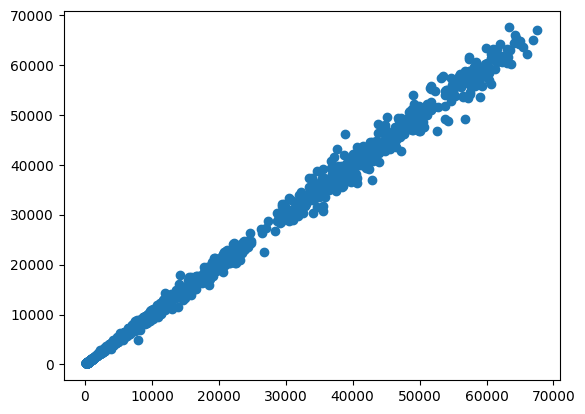

In [15]:
plt.scatter(data['Open'], data['Close'])

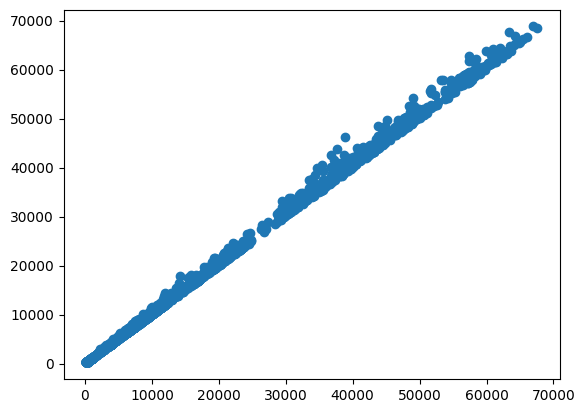

In [16]:
plt.scatter(data['Open'], data['High'])

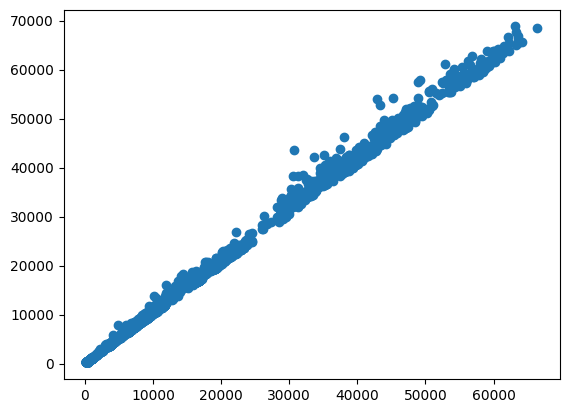

In [17]:
plt.scatter(data['Low'], data['High'])

In [53]:
correlation_matrix = new_data.corr()

In [54]:
correlation_matrix

,Open,High,Low,Close
Open,1.000000,0.999507,0.999094,0.998779
High,0.999507,1.000000,0.998998,0.999457
Low,0.999094,0.998998,1.000000,0.999365
Close,0.998779,0.999457,0.999365,1.000000


<AxesSubplot: >

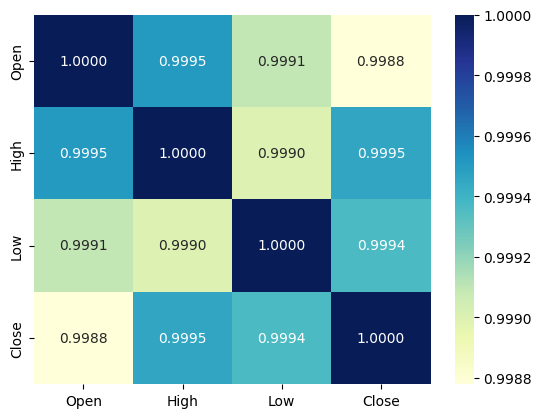

In [55]:
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu", fmt='.4f')

From the above outputs we can infer that all the features : 'High', 'Low', 'Open', 'Close' are highly correlated

Getting correlation coeffients with numpy

In [18]:
np.corrcoef(np.array(data['Open']),np.array(data['High']))[0,1]

0.999506875142151

In [19]:
np.corrcoef(np.array(data['Open']),np.array(data['Low']))[0,1]

0.9990941245912843

In [20]:
np.corrcoef(np.array(data['High']),np.array(data['Low']))[0,1]

0.9989984708559835

In [21]:
np.corrcoef(np.array(data['Open']),np.array(data['Close']))[0,1]

0.9987787409653766

With the correlation coefficients grater than 0.9 we can tell that the features are highly correlated

We can observe that covariance coefficient and correlation coefficient are the same which suggests that the variables have a strong linear relationship, and the strength and direction of that relationship are not affected by the scale or units of measurement of the variables.

PCA

Since all the features are highly correlated, instead of taking all the variables we can perform PCA on these varibles to get single component which is a representative component of all these features

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components = 1)

In [24]:
df = data[['Open', 'High', 'Low', 'Close']]

In [25]:
df

,Open,High,Low,Close
0,465.864014,468.174011,452.421997,457.334015
1,456.859985,456.859985,413.104004,424.440002
2,424.102997,427.834991,384.532013,394.795990
3,394.673004,423.295990,389.882996,408.903992
4,408.084991,412.425995,393.181000,398.821014
...,...,...,...,...
3097,20187.876953,20792.525391,20068.660156,20632.410156
3098,20628.029297,22185.031250,20448.806641,22163.949219
3099,22156.406250,24550.837891,21918.199219,24197.533203
3100,24201.765625,26514.716797,24081.183594,24746.074219


In [26]:
pca.fit(df)

PCA(n_components=1)

In [27]:
x = pca.transform(df)

In [28]:
df['PCA'] = x

/tmp/ipykernel_31/2381701785.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PCA'] = x


In [29]:
df

,Open,High,Low,Close,PCA
0,465.864014,468.174011,452.421997,457.334015,-25209.796632
1,456.859985,456.859985,413.104004,424.440002,-25255.662424
2,424.102997,427.834991,384.532013,394.795990,-25315.658512
3,394.673004,423.295990,389.882996,408.903992,-25323.057351
4,408.084991,412.425995,393.181000,398.821014,-25325.367639
...,...,...,...,...,...
3097,20187.876953,20792.525391,20068.660156,20632.410156,14711.169657
3098,20628.029297,22185.031250,20448.806641,22163.949219,16596.962070
3099,22156.406250,24550.837891,21918.199219,24197.533203,20307.037724
3100,24201.765625,26514.716797,24081.183594,24746.074219,23663.431860


The pca component obtained is the representative of all the four other features. This principal component can be used for training our model

In [30]:
df1 = df['Close']

In [31]:
df1.head()

0    457.334015
1    424.440002
2    394.795990
3    408.903992
4    398.821014
Name: Close, dtype: float64

Implementing moving average

In [32]:
bit_data = []
for i in range(10):
    bit_data.append(df1[i])
    
for i in range(10,len(df1)):
    sumof = 0
    for j in range(1,11,1):
        sumof += df1[i-j]
    bit_data.append(sumof/10)

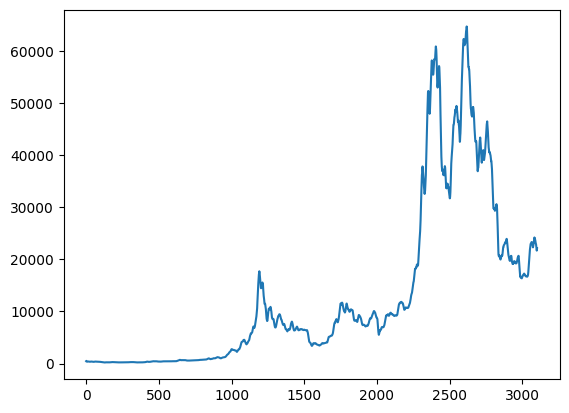

In [33]:
plt.plot(bit_data)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
bit_data =  scaler.fit_transform(np.array(bit_data).reshape(-1,1))
bit_data =  scaler.fit_transform(np.array(df).reshape(-1,1))

In [35]:
bit_data

array([[0.19505559],
       [0.19507279],
       [0.19495552],
       ...,
       [0.37391442],
       [0.37644375],
       [0.36608395]])

In [36]:
bit_data.shape

(15510, 1)

Splitting data into train and test using timestamp

In [37]:
# splitting the data set into train and test data
training_size = int(len(bit_data)*0.80)
test_size = len(bit_data) - training_size
train_data, test_data = bit_data[:training_size,:], bit_data[training_size:len(bit_data),:1]

In [38]:
# creating data set for LSTM model, for each output data the 100 days back prices are considered as features
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [39]:
time_step = 50
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [40]:
x_train

array([[0.19505559, 0.19507279, 0.19495552, ..., 0.19456532, 0.1945982 ,
        0.00311535],
       [0.19507279, 0.19495552, 0.19499209, ..., 0.1945982 , 0.00311535,
        0.19459173],
       [0.19495552, 0.19499209, 0.00390813, ..., 0.00311535, 0.19459173,
        0.19461456],
       ...,
       [0.4675972 , 0.43365696, 0.45031592, ..., 0.44425728, 0.4355551 ,
        0.44394056],
       [0.43365696, 0.45031592, 0.42812494, ..., 0.4355551 , 0.44394056,
        0.49645049],
       [0.45031592, 0.42812494, 0.44264503, ..., 0.44394056, 0.49645049,
        0.44362323]])

In [41]:
x_train.shape

(12357, 50)

we have to reshape x data as LSTM takes input with 3 diimensions

In [42]:
# converting the data into 3-D data by reshaping it to feed it into LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [43]:
x_train.shape

(12357, 50, 1)

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [46]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (50,1)))
model.add(LSTM(75, return_sequences = True))
# model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 100)           40800     
                                                                 
 lstm_5 (LSTM)               (None, 50, 75)            52800     
                                                                 
 lstm_6 (LSTM)               (None, 50)                25200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 118,851
Trainable params: 118,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=25, verbose=1)

Epoch 1/100
495/495 [==============================] - 18s 16ms/step - loss: 0.0048 - val_loss: 0.0031
Epoch 2/100
495/495 [==============================] - 7s 14ms/step - loss: 0.0042 - val_loss: 0.0050
Epoch 3/100
495/495 [==============================] - 7s 15ms/step - loss: 0.0016 - val_loss: 0.0024
Epoch 4/100
495/495 [==============================] - 7s 14ms/step - loss: 9.2356e-04 - val_loss: 0.0014
Epoch 5/100
495/495 [==============================] - 7s 14ms/step - loss: 2.4251e-04 - val_loss: 5.0044e-04
Epoch 6/100
495/495 [==============================] - 7s 14ms/step - loss: 1.2782e-04 - val_loss: 5.7097e-04
Epoch 7/100
495/495 [==============================] - 8s 16ms/step - loss: 1.0073e-04 - val_loss: 2.8485e-04
Epoch 8/100
495/495 [==============================] - 8s 16ms/step - loss: 8.6317e-05 - val_loss: 4.9935e-04
Epoch 9/100
495/495 [==============================] - 8s 15ms/step - loss: 6.3688e-05 - val_loss: 1.4571e-04
Epoch 10/100
495/495 [===============

In [49]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

96/96 [==============================] - 1s 5ms/step


In [50]:
import math
from sklearn.metrics import mean_squared_error

In [51]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.002988036384438453

In [52]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.009304416810406183

Building model with Principal component

In [69]:
df2 = df['PCA']

In [74]:
bit_data2 = []
for i in range(10):
    bit_data2.append(df2[i])
    
for i in range(10,len(df2)):
    sumof = 0
    for j in range(1,11,1):
        sumof += df2[i-j]
    bit_data2.append(sumof/10)

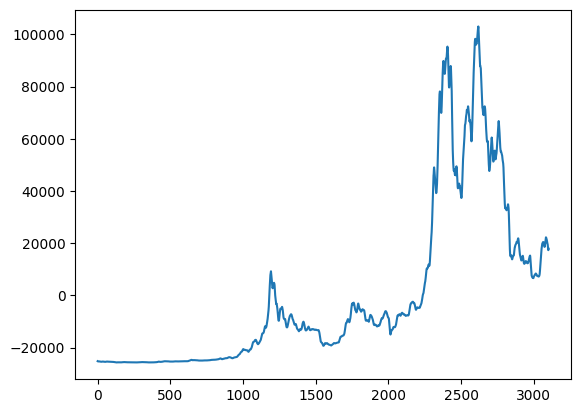

In [75]:
plt.plot(bit_data2)

In [77]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
bit_data2 =  scaler.fit_transform(np.array(bit_data2).reshape(-1,1))
bit_data2 =  scaler.fit_transform(np.array(df2).reshape(-1,1))

In [78]:
bit_data

array([[0.19505559],
       [0.19507279],
       [0.19495552],
       ...,
       [0.37391442],
       [0.37644375],
       [0.36608395]])

In [79]:
bit_data.shape

(15510, 1)

In [80]:
# splitting the data set into train and test data
training_size = int(len(bit_data)*0.80)
test_size = len(bit_data) - training_size
train_data, test_data = bit_data[:training_size,:], bit_data[training_size:len(bit_data),:1]

In [81]:
# creating data set for LSTM model, for each output data the 100 days back prices are considered as features
def create_dataset(dataset, time_step):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [82]:
time_step = 50
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [83]:
x_train

array([[0.19505559, 0.19507279, 0.19495552, ..., 0.19456532, 0.1945982 ,
        0.00311535],
       [0.19507279, 0.19495552, 0.19499209, ..., 0.1945982 , 0.00311535,
        0.19459173],
       [0.19495552, 0.19499209, 0.00390813, ..., 0.00311535, 0.19459173,
        0.19461456],
       ...,
       [0.4675972 , 0.43365696, 0.45031592, ..., 0.44425728, 0.4355551 ,
        0.44394056],
       [0.43365696, 0.45031592, 0.42812494, ..., 0.4355551 , 0.44394056,
        0.49645049],
       [0.45031592, 0.42812494, 0.44264503, ..., 0.44394056, 0.49645049,
        0.44362323]])

In [84]:
x_train.shape

(12357, 50)

In [85]:
# converting the data into 3-D data by reshaping it to feed it into LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [89]:
model = Sequential()
model.add(LSTM(100, return_sequences = True, input_shape = (50,1)))
model.add(LSTM(75, return_sequences = True))
model.add(LSTM(51, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer="adam")

In [90]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50, 100)           40800     
                                                                 
 lstm_13 (LSTM)              (None, 50, 75)            52800     
                                                                 
 lstm_14 (LSTM)              (None, 50, 51)            25908     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 139,959
Trainable params: 139,959
Non-trainable params: 0
_________________________________________________________________


In [91]:
model.fit(x_train,y_train, validation_data=(x_test,y_test), epochs=100, batch_size=25, verbose=1)

Epoch 1/100
495/495 [==============================] - 40s 19ms/step - loss: 0.0050 - val_loss: 0.0031
Epoch 2/100
495/495 [==============================] - 8s 16ms/step - loss: 0.0046 - val_loss: 0.0028
Epoch 3/100
495/495 [==============================] - 8s 17ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 4/100
495/495 [==============================] - 8s 16ms/step - loss: 0.0033 - val_loss: 0.0021
Epoch 5/100
495/495 [==============================] - 9s 17ms/step - loss: 7.3172e-04 - val_loss: 0.0052
Epoch 6/100
495/495 [==============================] - 8s 16ms/step - loss: 4.2854e-04 - val_loss: 0.0025
Epoch 7/100
495/495 [==============================] - 8s 17ms/step - loss: 3.2448e-04 - val_loss: 0.0013
Epoch 8/100
495/495 [==============================] - 8s 16ms/step - loss: 3.1689e-04 - val_loss: 0.0011
Epoch 9/100
495/495 [==============================] - 8s 16ms/step - loss: 1.7326e-04 - val_loss: 2.7885e-04
Epoch 10/100
495/495 [==============================] - 8

In [92]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

96/96 [==============================] - 1s 5ms/step


In [93]:
math.sqrt(mean_squared_error(y_train, train_predict))

0.003987808442297901

In [94]:
math.sqrt(mean_squared_error(y_test, test_predict))

0.00732315379610199